In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-white')

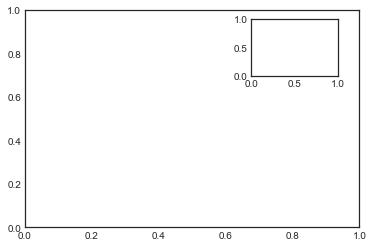

In [2]:
ax1 = plt.axes()
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

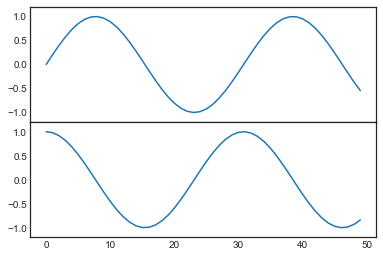

In [11]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.5,0.8,0.4], xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

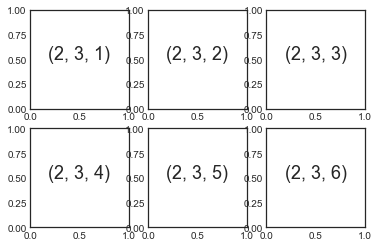

In [12]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

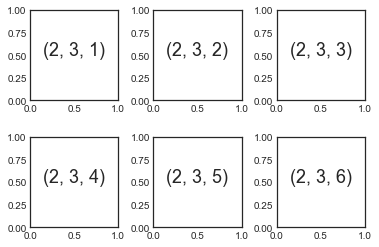

In [14]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)), fontsize=18, ha='center')

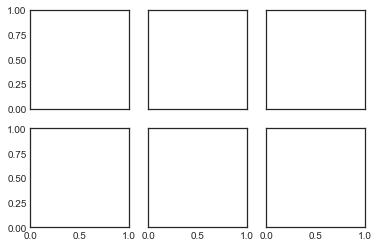

In [15]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

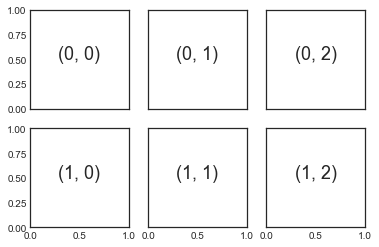

In [16]:
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
fig

In [17]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

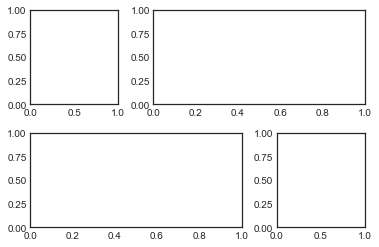

In [18]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

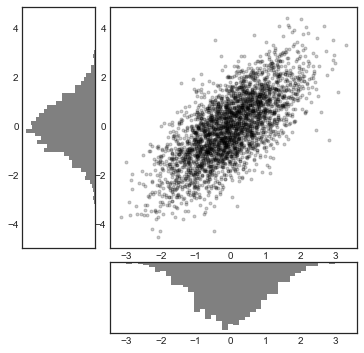

In [19]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

x_hist.hist(x, 40, histtype='stepfilled', orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(x, 40, histtype='stepfilled', orientation='horizontal', color='gray')
y_hist.invert_xaxis()

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np

In [5]:
births = pd.read_csv('births.csv')

In [6]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 100*births.month + births.day, format='%Y%m%d')

births_by_date = births.pivot_table('births', [births.index.month, births.index.day])

births_by_date.index = [pd.datetime(2012, month, day) for (month,day) in births_by_date.index]

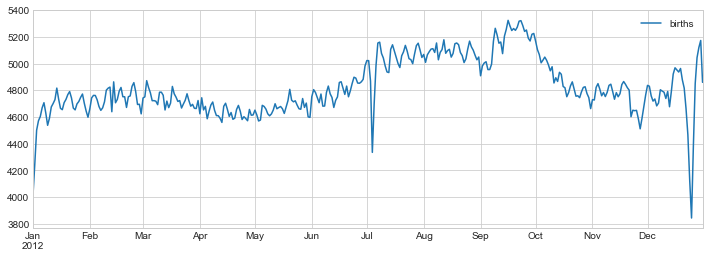

In [7]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

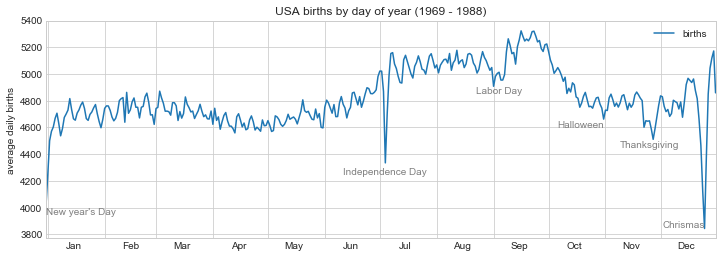

In [8]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Chrismas", ha='right', **style)

ax.set(title='USA births by day of year (1969 - 1988)' , ylabel='average daily births')

ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))


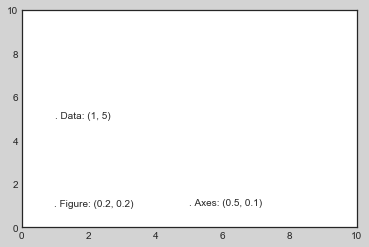

In [3]:
fig, ax = plt.subplots(facecolor='lightgray')
ax.axis([0, 10, 0, 10])

ax.text(1, 5, ". Data: (1, 5)", transform=ax.transData)
ax.text(0.5, 0.1, ". Axes: (0.5, 0.1)", transform=ax.transAxes)
ax.text(0.2, 0.2, ". Figure: (0.2, 0.2)", transform=fig.transFigure);

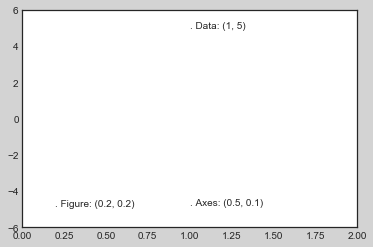

In [4]:
ax.set_xlim(0, 2)
ax.set_ylim(-6, 6)
fig

Text(2, -6, 'local minimum')

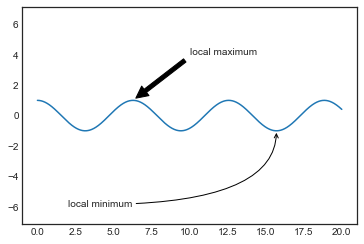

In [5]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal')

ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
           arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5*np.pi,-1), xytext=(2,-6),
           arrowprops=dict(arrowstyle="->",
                          connectionstyle="angle3,angleA=0,angleB=-90"))

(3600, 5400)

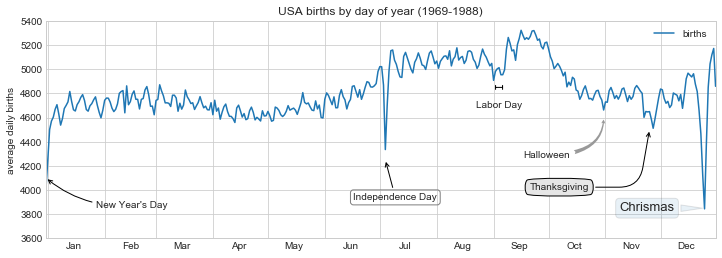

In [14]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

ax.annotate("New Year's Day", xy=('2012-1-1', 4100), xycoords='data',
            xytext=(50, -30), textcoords='offset points',
           arrowprops=dict(arrowstyle="->",
                          connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250), xycoords='data',
           bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate("Labor Day", xy=('2012-9-4', 4850), xycoords='data', ha='center',
           xytext=(0, -20), textcoords='offset points')

ax.annotate("", xy=('2012-9-1', 4850),xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
           arrowprops={'arrowstyle':'|-|,widthA=0.2,widthB=0.2'})

ax.annotate("Halloween", xy=('2012-10-31', 4600), xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
           arrowprops=dict(arrowstyle="fancy",
                          fc="0.6", ec="none",
                          connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate("Thanksgiving", xy=('2012-11-25', 4500), xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
           bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
           arrowprops=dict(arrowstyle="->",
                          connectionstyle="angle,angleA=0,angleB=80,rad=20"))

ax.annotate("Chrismas", xy=('2012-12-25', 3850), xycoords='data',
            xytext=(-30, 0), textcoords='offset points',
           size=13, ha='right', va='center',
           bbox=dict(boxstyle='round', alpha=0.1),
           arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))


ax.set(title='USA births by day of year (1969-1988)',
      ylabel='average daily births')

ax.xaxis.set_major_locator(mpl.dates.MonthLocator())  
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

ax.set_ylim(3600, 5400)


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

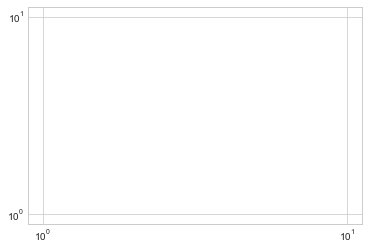

In [2]:
ax = plt.axes(xscale='log', yscale='log')

In [3]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())

In [4]:
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

In [7]:
ax.xaxis.get_minor_formatter?

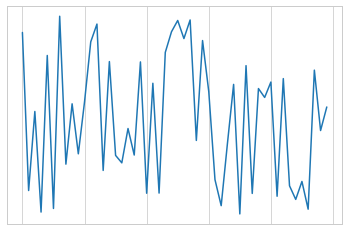

In [8]:
ax = plt.axes()
ax.plot(np.random.rand(50))

ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

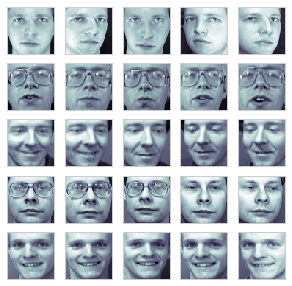

In [13]:
fig, ax = plt.subplots(5, 5, figsize=(5, 5))

from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap='bone')

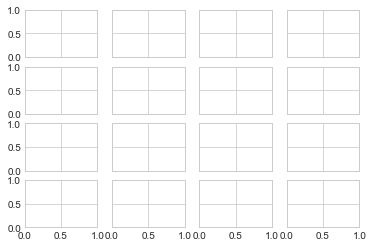

In [14]:
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)

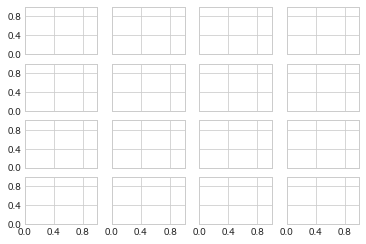

In [15]:
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

(0, 9.42477796076938)

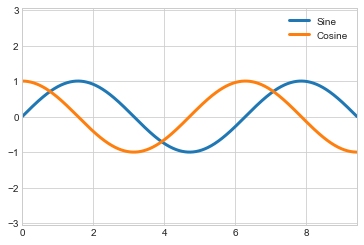

In [16]:
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi)

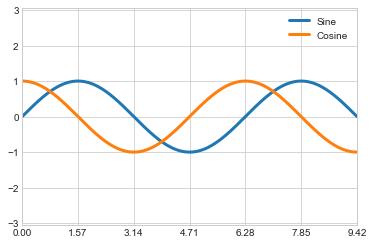

In [23]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi/4))
fig

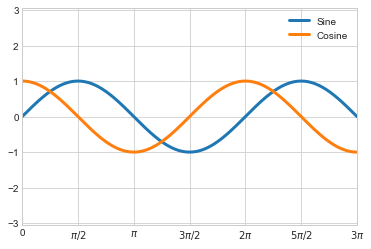

In [24]:
def format_func(value, tick_number):
    N = int(np.round(2 * value / np.pi))
    if N == 0:
        return "0"
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)
    
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

In [2]:
plt.style.use('classic')

(array([  4.,  14.,  47., 153., 258., 265., 160.,  74.,  20.,   5.]),
 array([-3.58575668, -2.88940829, -2.1930599 , -1.49671151, -0.80036312,
        -0.10401473,  0.59233366,  1.28868205,  1.98503044,  2.68137883,
         3.37772722]),
 <a list of 10 Patch objects>)

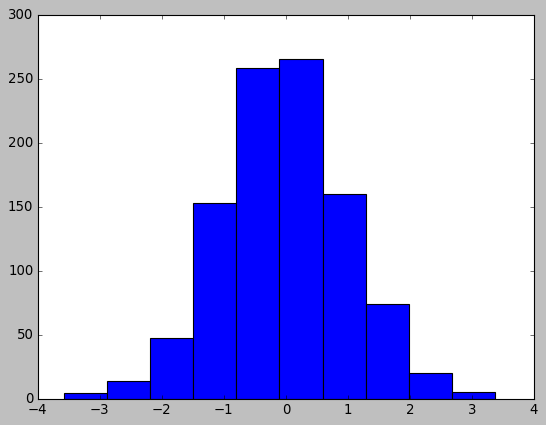

In [35]:
x = np.random.randn(1000)
plt.hist(x)

(array([  4.,  14.,  47., 153., 258., 265., 160.,  74.,  20.,   5.]),
 array([-3.58575668, -2.88940829, -2.1930599 , -1.49671151, -0.80036312,
        -0.10401473,  0.59233366,  1.28868205,  1.98503044,  2.68137883,
         3.37772722]),
 <a list of 10 Patch objects>)

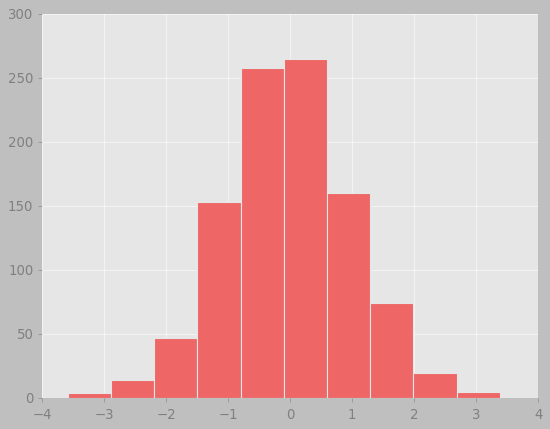

In [42]:
ax = plt.axes()
ax.set_axisbelow(True)
ax.set_facecolor('#E6E6E6')

plt.grid(color='w', linestyle='solid')

for spine in ax.spines.values():
    spine.set_visible(False)
    
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')

ax.hist(x, edgecolor='#E6E6E6', color='#EE6666')

In [6]:
Ipython_default = plt.rcParams.copy()

In [44]:
from matplotlib import cycler

In [46]:
colors = cycler('color',
               ['#EE6666', '#3388BB', '#9988DD',
               '#EECC55', '#88BB44', '#FFBBBB'])

plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
      axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

(array([  4.,  14.,  47., 153., 258., 265., 160.,  74.,  20.,   5.]),
 array([-3.58575668, -2.88940829, -2.1930599 , -1.49671151, -0.80036312,
        -0.10401473,  0.59233366,  1.28868205,  1.98503044,  2.68137883,
         3.37772722]),
 <a list of 10 Patch objects>)

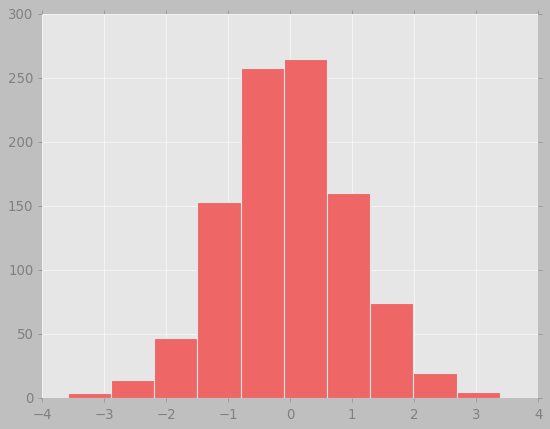

In [47]:
plt.hist(x)

In [4]:
plt.style.available[:]

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [5]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

In [7]:
plt.rcParams.update(Ipython_default);

C:\Users\Bhavesh kumar\Anaconda3\lib\site-packages\matplotlib\__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
C:\Users\Bhavesh kumar\Anaconda3\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


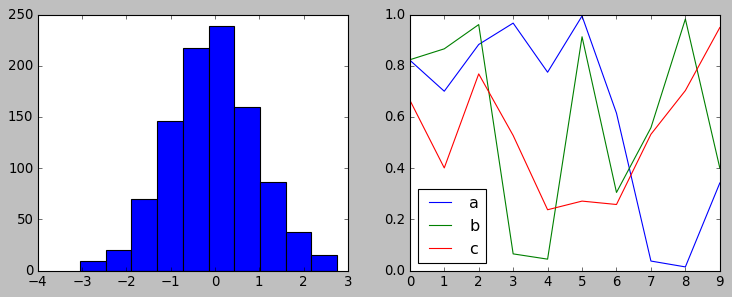

In [8]:
hist_and_lines()

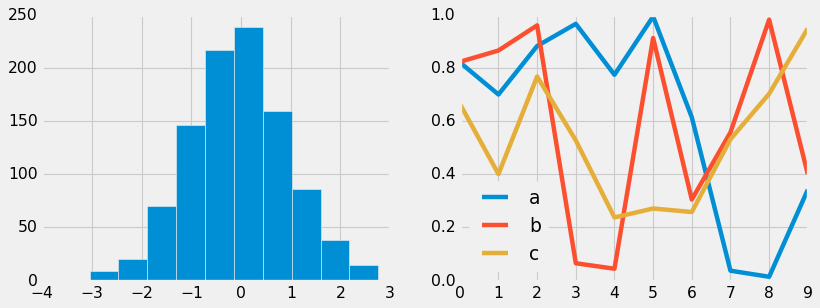

In [9]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

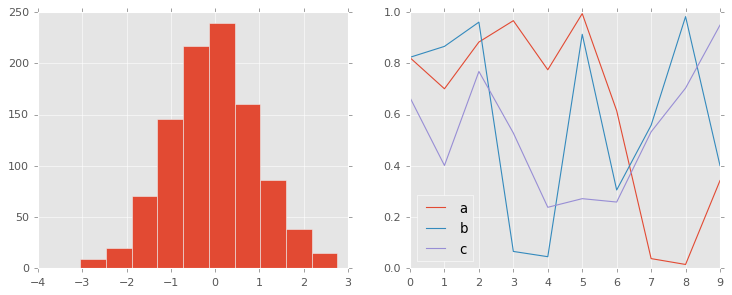

In [10]:
with plt.style.context('ggplot'):
    hist_and_lines()

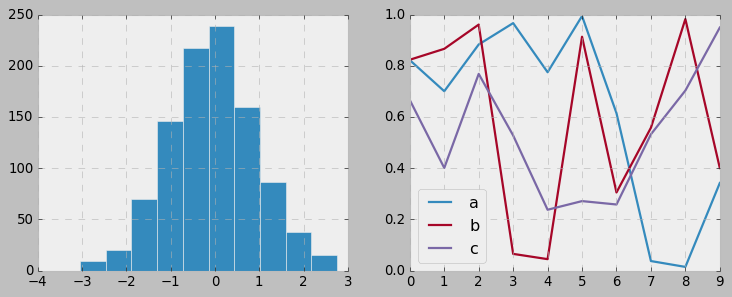

In [11]:
with plt.style.context('bmh'):
    hist_and_lines()

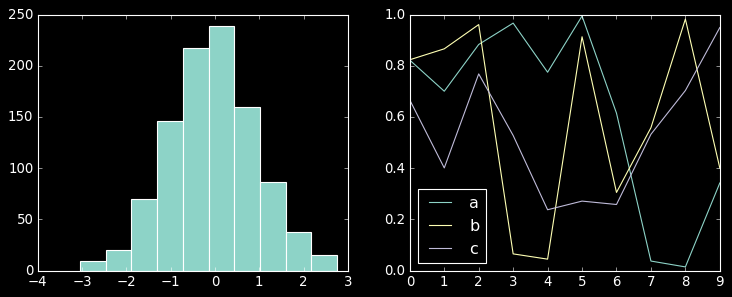

In [12]:
with plt.style.context('dark_background'):
    hist_and_lines()

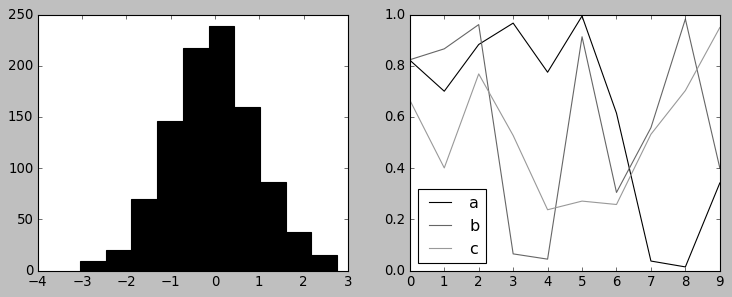

In [13]:
with plt.style.context('grayscale'):
    hist_and_lines()

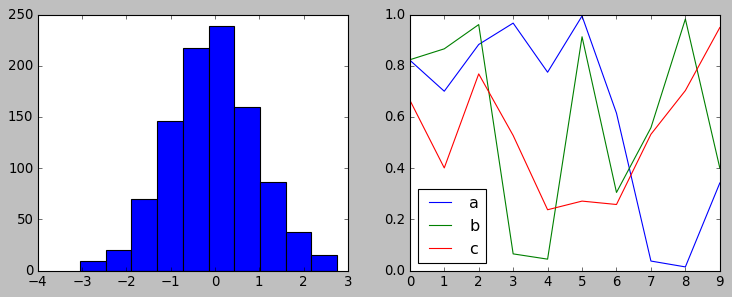

In [14]:
import seaborn
hist_and_lines()

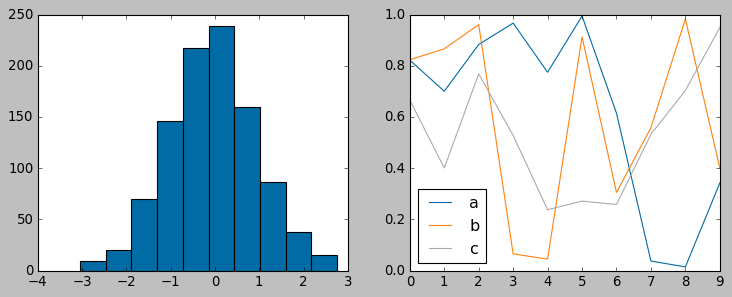

In [19]:
with plt.style.context('tableau-colorblind10'):
    hist_and_lines()

In [20]:
from mpl_toolkits import mplot3d

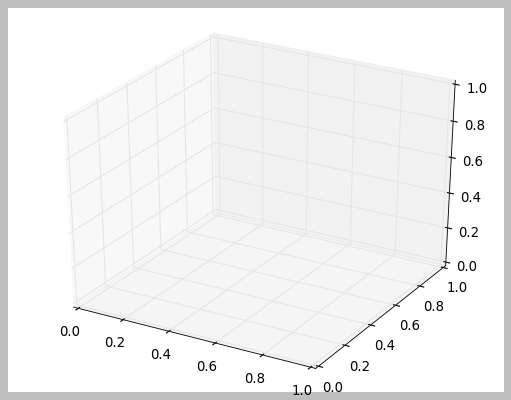

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')

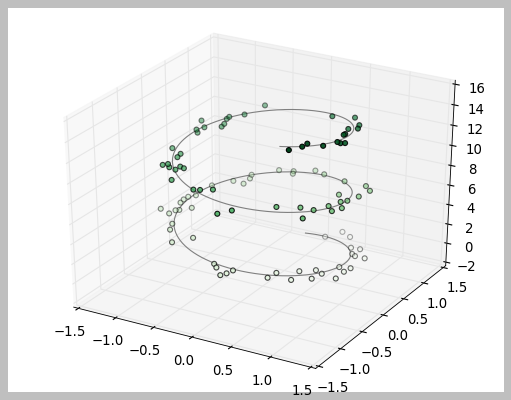

In [22]:
ax = plt.axes(projection='3d')

zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [4]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

Text(0.5, 0, 'z')

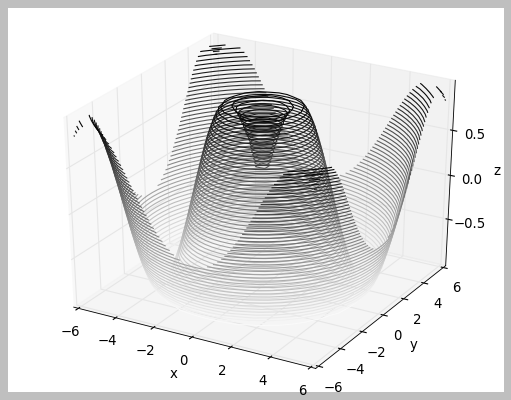

In [24]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

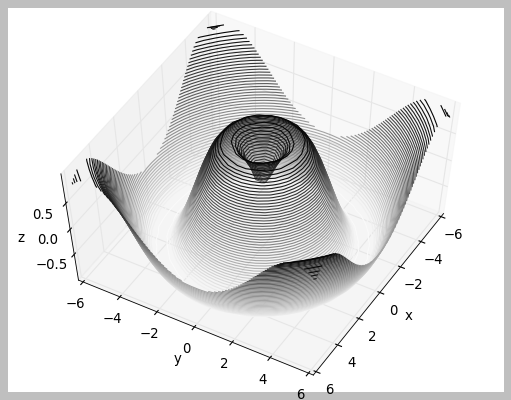

In [31]:
ax.view_init(60, 30)
fig

Text(0.5, 0.92, 'wireframe')

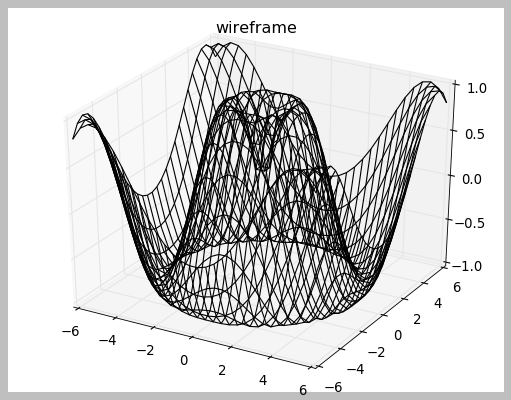

In [32]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe')

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [2]:
from mpl_toolkits import mplot3d

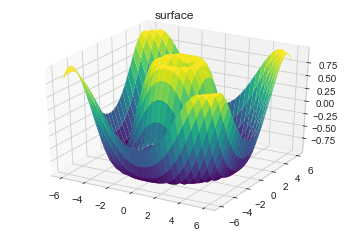

In [11]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
               cmap='viridis', edgecolor='none')
ax.set_title('surface');

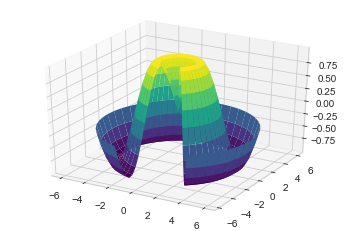

In [18]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
               cmap='viridis', edgecolor='none')

In [19]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

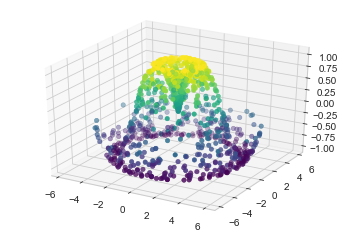

In [20]:
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5)

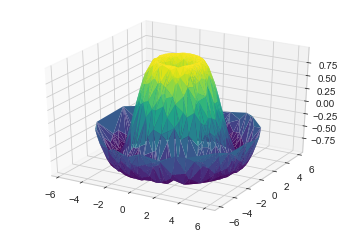

In [21]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
               cmap='viridis', edgecolor='none')

In [22]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

In [23]:
phi = 0.5 * theta

In [24]:
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(w * np.sin(phi))

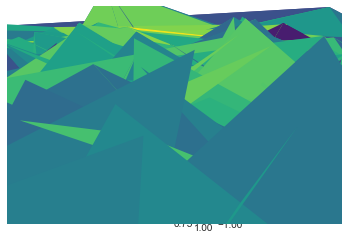

In [27]:
from matplotlib.tri import Triangulation
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles,
               cmap='viridis', linewidths=0.2);

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1)